# Data Analyst Intern - Hotel Reviews Assessment Solution

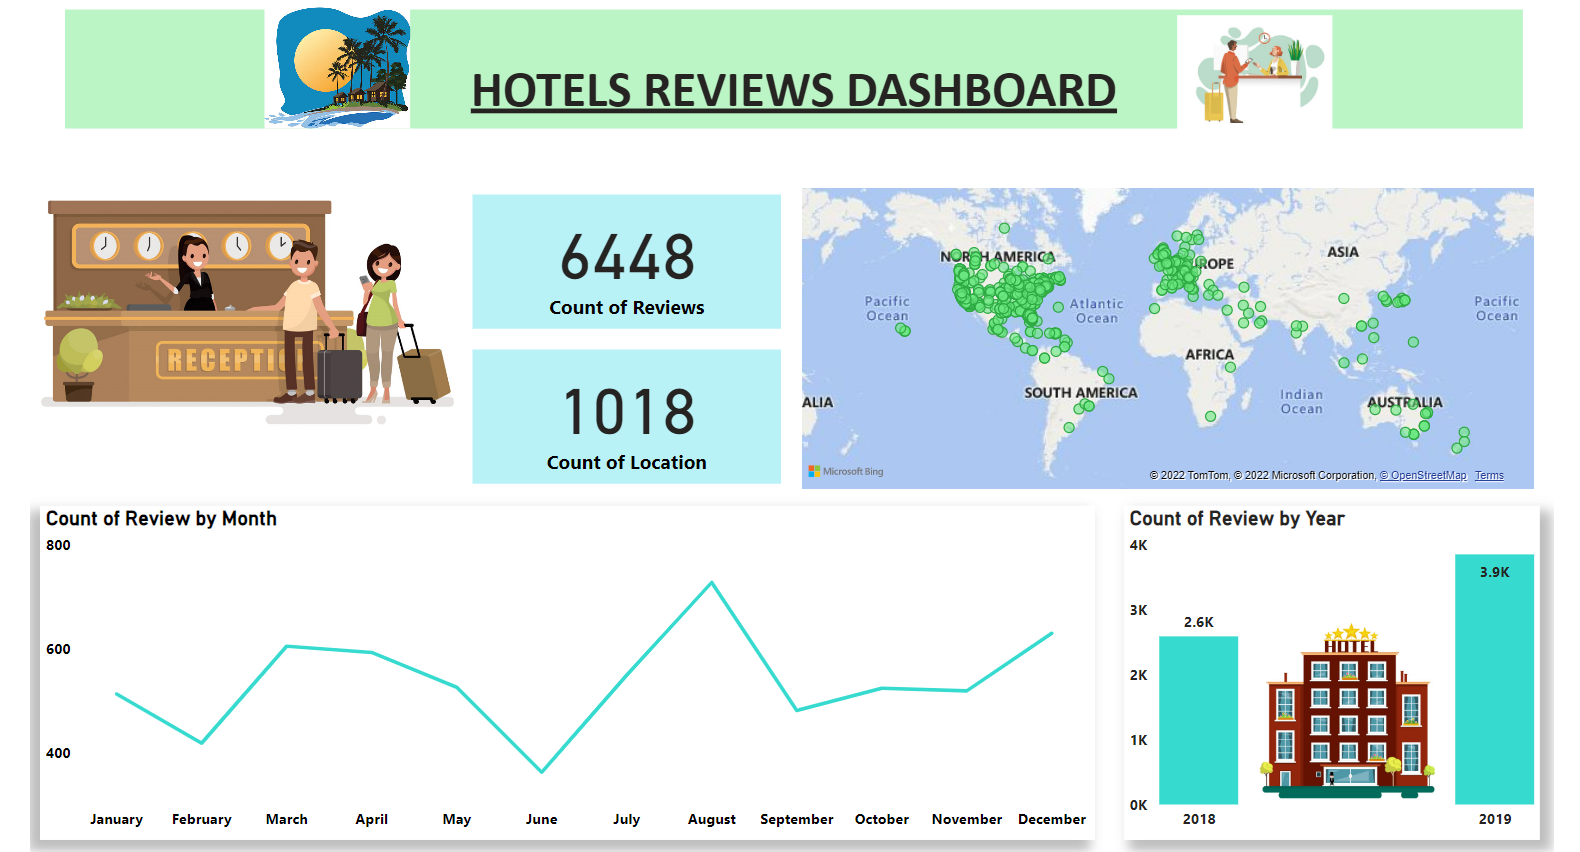

# Please visit the below link to interact with the above dashboard

https://app.powerbi.com/view?r=eyJrIjoiYjcxMWVlZDQtY2M3ZC00NmY0LTkzY2EtNGJhNzhlNGY0NTg3IiwidCI6IjIyY2Q4YTliLTMyZDctNGJhNS1iYTEyLWI2ZDZjZDI2YmM0OCJ9

In [1]:
# Let's import the python libraries and load our data 

import numpy as np
import pandas as pd

In [6]:
df = pd.read_excel("D:\Data_Analyst.xlsx")

In [8]:
df.columns

Index(['Review', 'date', 'Location'], dtype='object')

In [9]:
df

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America
6444,·the internet barely worked or didn't work,2019-07-12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America


In [12]:
#The data set includes the resort/hotel reviews given by the customers along with the dates and the hotels locations

In [60]:
df.head(5)

#Let's see the first 10 rows to get an idea about the data

,Review,date,Location,Year,Month
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,2019,8
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,2019,8
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,2019,8
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN,2019,8
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,2019,8


In [14]:
df.describe()

C:\Users\DELL\AppData\Local\Temp/ipykernel_1256/3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Review,date,Location
count,6393,6448,1711
unique,6384,385,1082
top,Amazing\n \n Read more\n Read less,2019-06-01 00:00:00,United States of America
freq,4,150,116
first,NaN,2018-08-01 00:00:00,NaN
last,NaN,2019-08-20 00:00:00,NaN


# Seeing the above data we can say that:

1) There are 6384 unique reviews given by the customers.

2) The total number of unique hotels locations is 1082.

3) There are many null values in Location column, many customers didn't fill the location while submitting the reviews.

In [23]:
#Calculating number of null or missing values in each column
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

# IMPORTANT - There are 4737 reviews where location is not shared by customers.

In [46]:
df['Location'].value_counts()

United States of America    116
New York                     34
California                   19
San Jose                     19
Canada                       16
                           ... 
Halifax, N.S.                 1
State College, PA             1
Los ángeles , us              1
Stroudsburg Pa US             1
Trinidad and Tobago           1
Name: Location, Length: 1082, dtype: int64

# Maximum reviews were for USA location followed by New York

In [57]:
#Extracting Year from date column
df['Year'] = pd.to_datetime(df['date']).dt.year

In [58]:
#Extracting Month from date column
df['Month'] = pd.to_datetime(df['date']).dt.month

In [65]:
#Extracting Day from date column
df['Day'] = pd.to_datetime(df['date']).dt.day

In [64]:
df

,Review,date,Location,Year,Month,Day
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,2019,8,20
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,2019,8,20
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,2019,8,20
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN,2019,8,20
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,2019,8,19
...,...,...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America,2019,7,12
6444,·the internet barely worked or didn't work,2019-07-12,United States of America,2019,7,12
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America,2019,7,10
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America,2019,7,10


In [61]:
df['Year'].value_counts()

2019    3856
2018    2592
Name: Year, dtype: int64

In [67]:
df['Month'].value_counts()

8     728
12    630
3     605
4     593
7     549
5     526
10    524
11    519
1     513
9     481
2     418
6     362
Name: Month, dtype: int64

In [69]:
df['Day'].value_counts()

1     1083
26     211
4      209
17     197
14     196
13     196
2      196
18     195
15     194
5      193
12     190
9      187
20     186
10     184
11     182
25     182
21     180
3      178
27     174
22     173
8      173
23     172
6      172
7      171
30     168
19     168
24     163
28     159
29     155
16     145
31     116
Name: Day, dtype: int64

# Clearly, there is increase of reviews in 2019 and maximum reviews shared in the month of AUGUST and on the 1st day of month and minimum in JUNE month and on 31st day of month.

# IMPORTANT - Second maximum number of bookings done in December as we have Christmas and New years preparations coming in, so hotels/resorts can come with special offers and discounts for increasing more bookings in that period.

# Busiest month for Hotels are August and December